## SVMs

Support vector machines can be used for linear and nonlinear classification, regression, and outlier dection. Best used for classfication tasks on complex small or medium datasets.

### Classification
Objective: trying to fit the largest possible street between two classes while limiting margin violations.      

Scikit-learn has three classification classes: LinearSVC, SGDClassifier, SVC.    

**Linear classification**     
- LinearSVC: based on liblinear library. Complexity is roughly O(m × n). Doesn't support kernel trick.
- SGDClassifier: applies regular Stochastic Gradient Descent to train a linear SVM classifier. Not as fast as LinearSVC, but good for huge datasets. Complexity is roughly O(m × n). Doesn't support kernel trick.         
 
**Non-linear classification:** 
- One approach is to add features (using PolynomialFeatures) which might make data linearly separable.
- Another approach is to use kernels, which give the effect of adding more polynomial features without actually adding them! This is implemented by the SVC class.

### Regression
Objective: trying to fit as many instances as possible on the street while limiting margin violations (instances off the street).     

Scikit-learn has two regression classes: LinearSVR and SVR     

**Linear regression**   
- LinearSVR: The width of the street is controlled by a hyperparameter ϵ.    

**Non-inear regression**      
- Use SVR class with kernel trick.

### Key Terms
**Linearly separable:** can be separated with a straight line      
**Large margin classification:** finding a decision boundary by fitting the largest possible 'street' between classes      
**Support vectors:** training data instances located on the edge of the street      
**Soft  margin classification:** less strict that large margin, objective is to find the balance between keeping street as wide as possible and limiting margin violations (instances in the middle of the road/wrong side)              
**C:** user-defined hyperparameter that controls street-width and margin violation. Small value of C -> wider street but more margin violations, large value of C -> smaller margin       
**Kernel:** 
Unlike the classification objective where classes are separated by a decision boundary, for regression the SVM tries to fit as many instances 

### Tips

In [57]:
# import packages
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
# Load the iris dataset and summarize (included with sklearn) 
iris = datasets.load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [19]:
# Petal length and width
X = iris["data"][:,(2,3)]
Y = iris["target"]

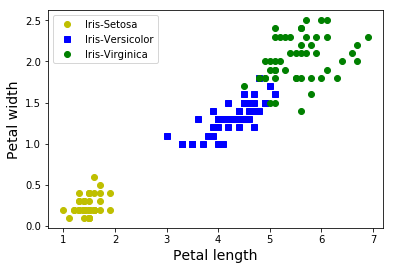

In [48]:
# Vizualize data
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "yo",label="Iris-Setosa")
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bs",label="Iris-Versicolor") 
plt.plot(X[:,0][Y==2], X[:,1][Y==2],"go", label="Iris-Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend()

In [65]:
# Let's choose the Setosa and Versicolor data as it is linearly separable
setosa_versicolor = (Y==0) | (Y ==1)
X = X[setosa_versicolor]
Y = Y[setosa_versicolor]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# hyperparameters
C = 5

# Use LinearSVC class to predict decision boundary
lin_clf = LinearSVC(loss="hinge",C=C)
lin_clf.fit(X_scaled,Y)
print("LinearSVC --- Intercept: {}, Coeff: {}".format(lin_clf.intercept_, lin_clf.coef_))


LinearSVC --- Intercept: [ 0.28480615], Coeff: [[ 1.05542384  1.09851578]]


C:\Users\JISSAC3\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 150
C:\Users\JISSAC3\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 150


[0, 5.5, 0, 2]

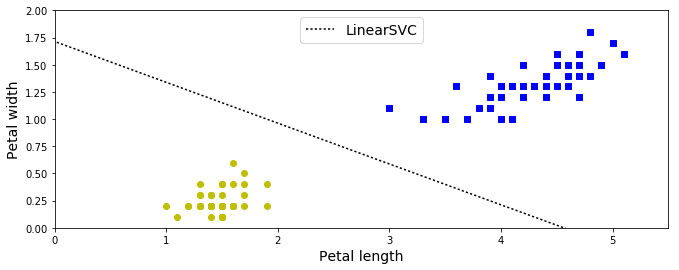

In [66]:
# Plot decision boundary

# Compute the slope and bias
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

## References

“Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron (O’Reilly). Copyright 2017 Aurélien Géron, 978-1-491-96229-9.”